# Lab 2: Facets, Plotting, Dplyr

- Reminder that your first homework is due on Friday (2/5)

## Review for the Homework

- facets
- geom_smooth

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [5]:
college_df <- read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv")
# https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/

Parsed with column specification:
cols(
  Major_code = col_double(),
  Major = col_character(),
  Major_category = col_character(),
  Total = col_double(),
  Employed = col_double(),
  Employed_full_time_year_round = col_double(),
  Unemployed = col_double(),
  Unemployment_rate = col_double(),
  Median = col_double(),
  P25th = col_double(),
  P75th = col_double()
)


In [8]:
head(college_df, n = 10)

Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000
1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000
1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000
1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000
1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000
1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000
1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.05086705,63000,39400,88000
1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.03923042,52000,35000,75000
1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05128983,52000,38000,75000
1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.04256333,58000,40500,80000


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


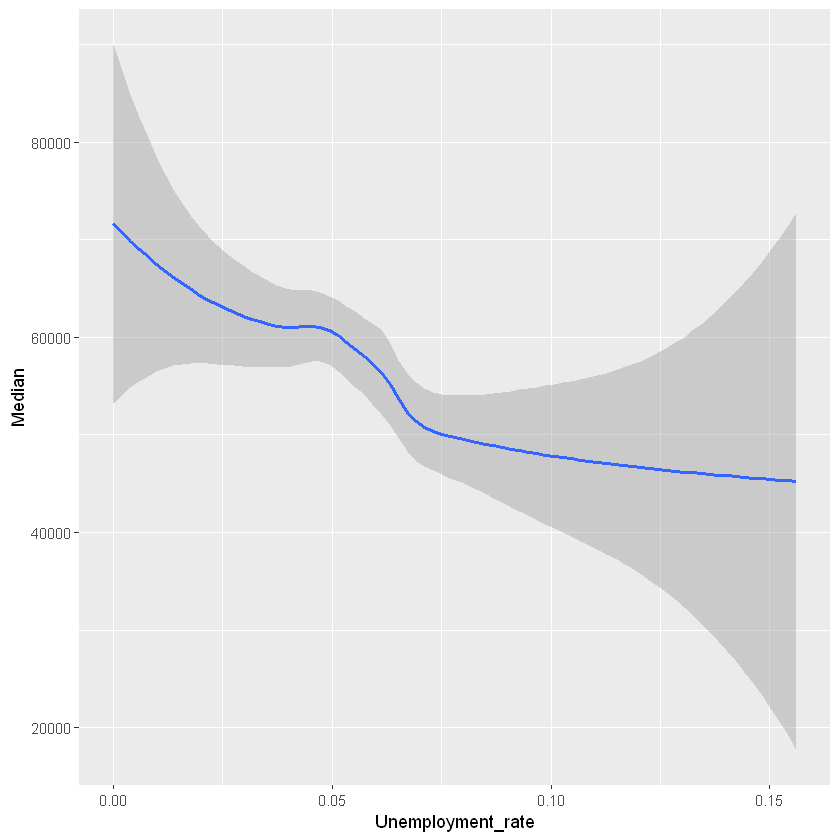

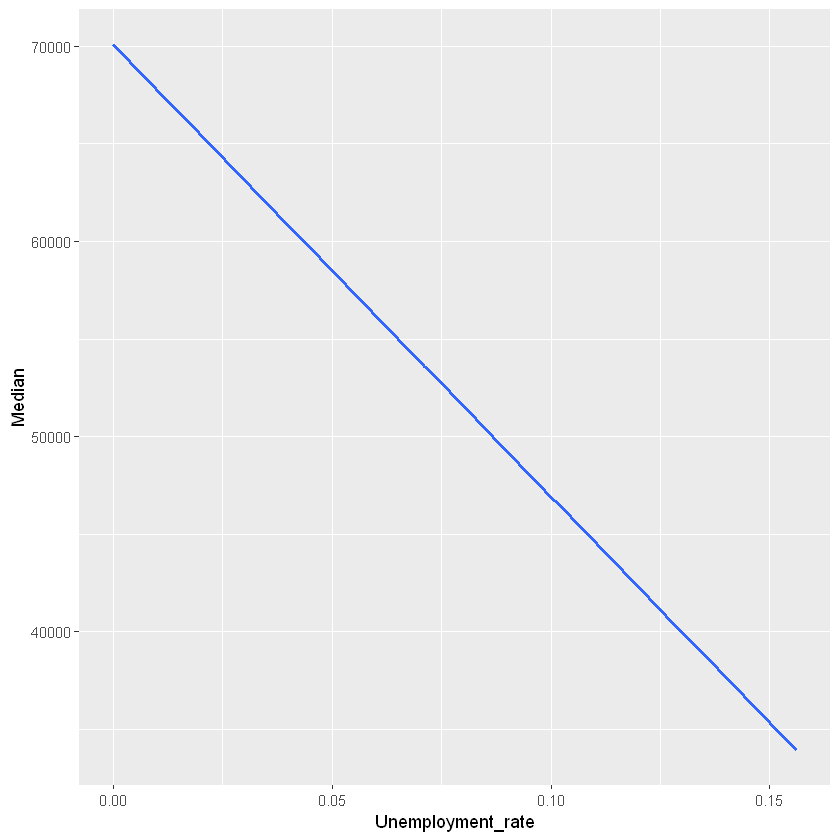

In [19]:
ggplot(data = college_df) +
    geom_smooth(mapping = aes(x = Unemployment_rate, y = Median))

ggplot(data = college_df) +
    geom_smooth(mapping = aes(x = Unemployment_rate, y = Median), method = 'lm', se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


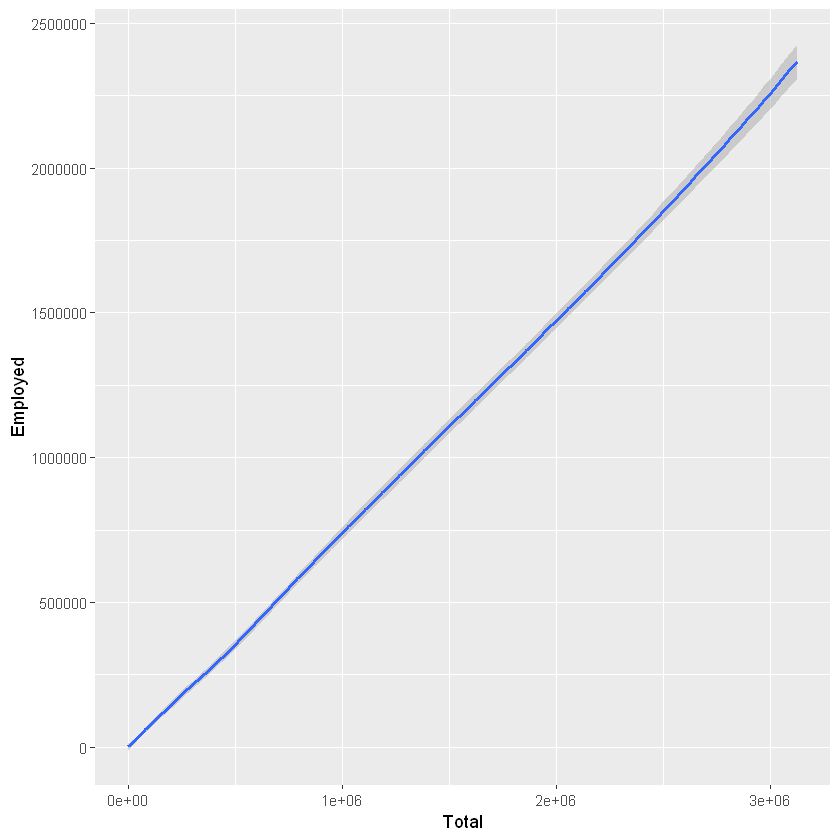

In [27]:
plot <- ggplot(data = college_df) +
    geom_smooth(mapping = aes(x = Total, y = Employed))
plot

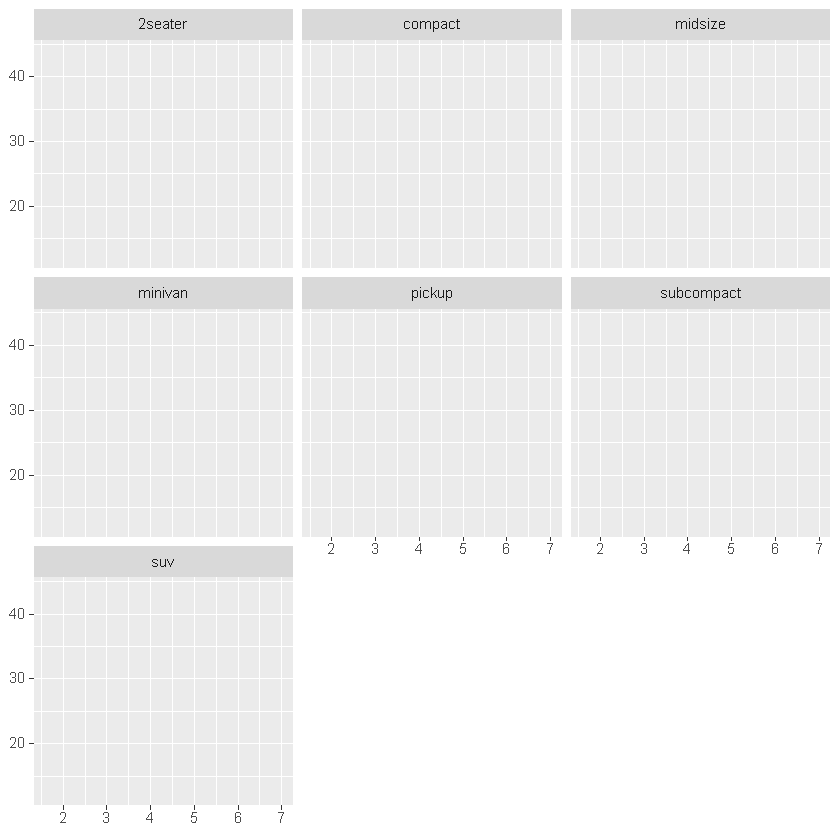

In [35]:
# https://ggplot2-book.org/facet.html
base <- ggplot(mpg, aes(displ, hwy)) + 
  geom_blank() + 
  xlab(NULL) + 
  ylab(NULL)

base + facet_wrap(. ~class)

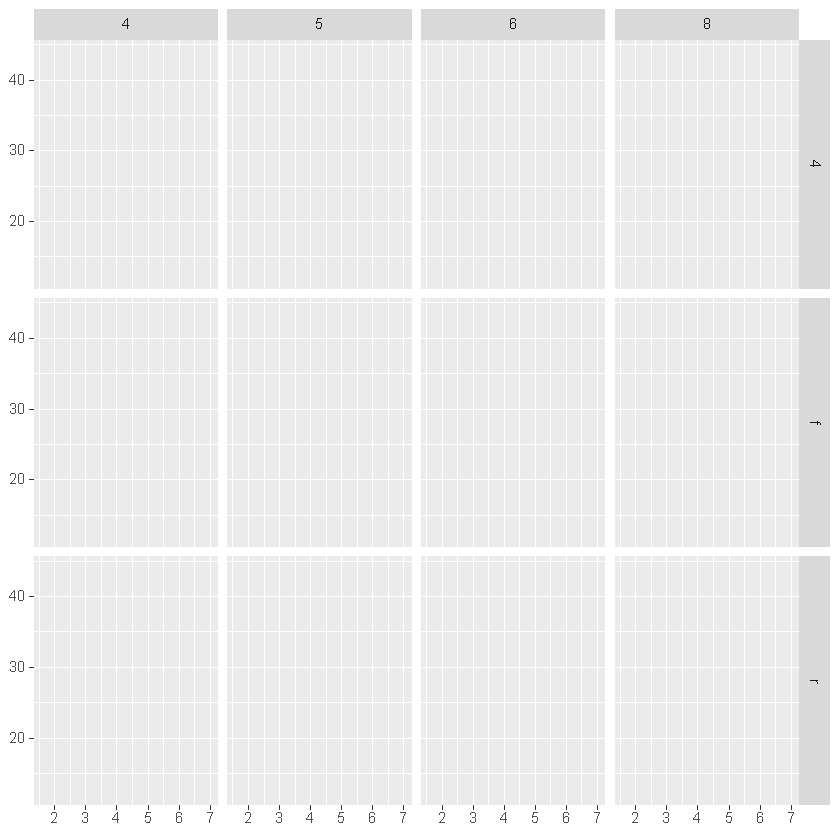

In [36]:
base + facet_grid(drv ~ cyl)

## Statistical Transformations and Positional Arguments

In [37]:
popn <- tribble(
~city, ~population,
"Istanbul", 15029231,
"Moscow", 12615279,
"Saint Petersburg", 9126366,
"Berlin", 5383890,
"Madrid", 3748148
)

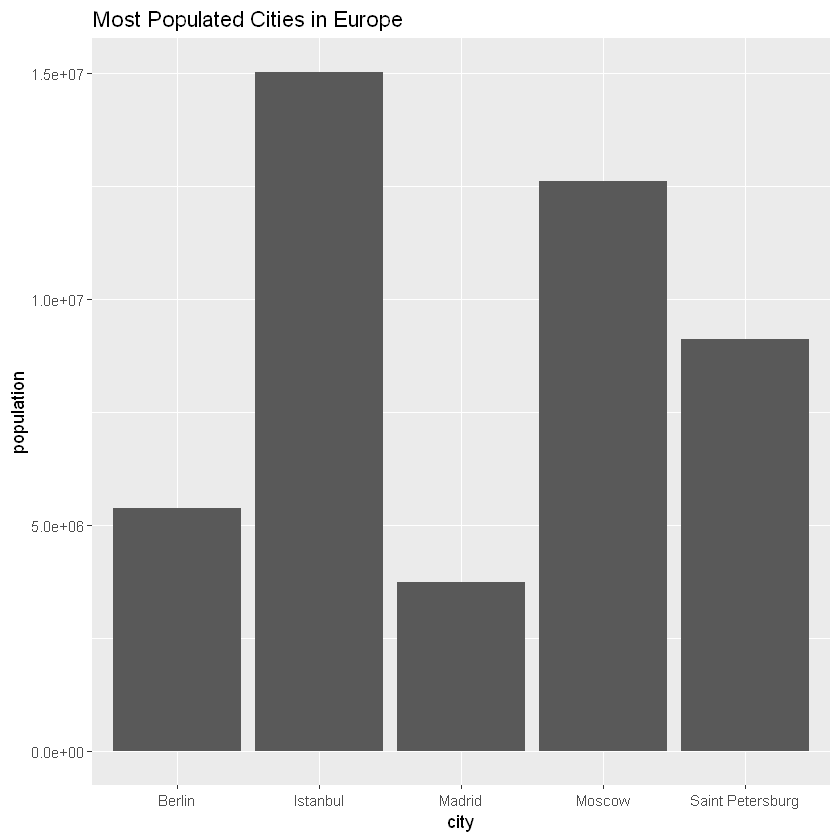

In [46]:
ggplot(popn) +
    geom_bar(mapping = aes(x = city, y = population), stat = "identity") +
    ggtitle("Most Populated Cities in Europe")

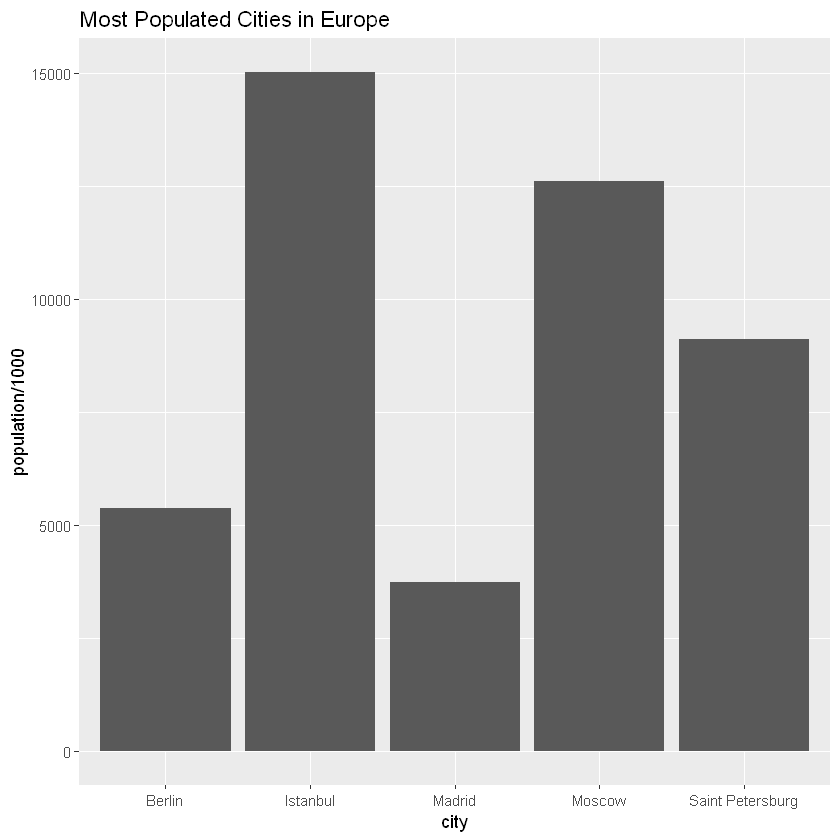

In [51]:
ggplot(popn) +
    geom_bar(mapping = aes(x = city, y = population / 1000), stat = "identity") +
    ggtitle("Most Populated Cities in Europe")

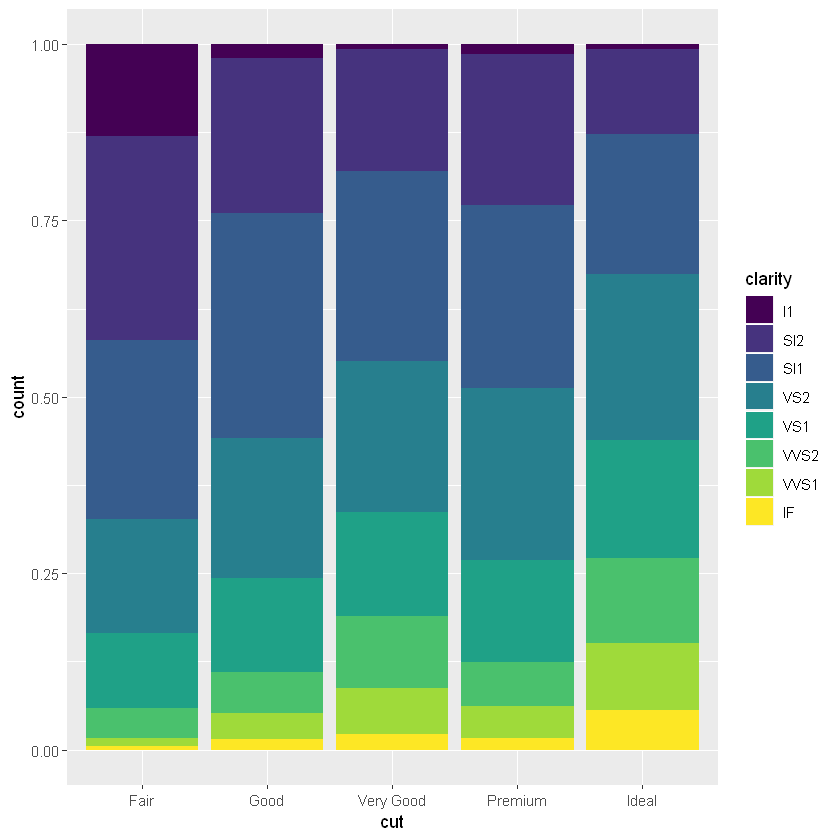

In [56]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

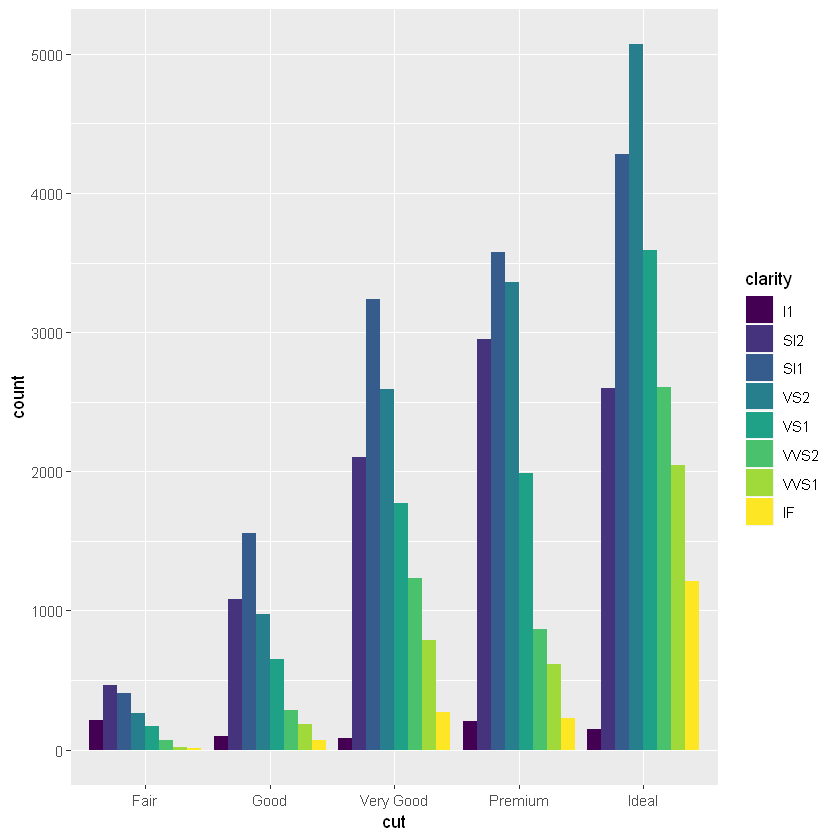

In [57]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

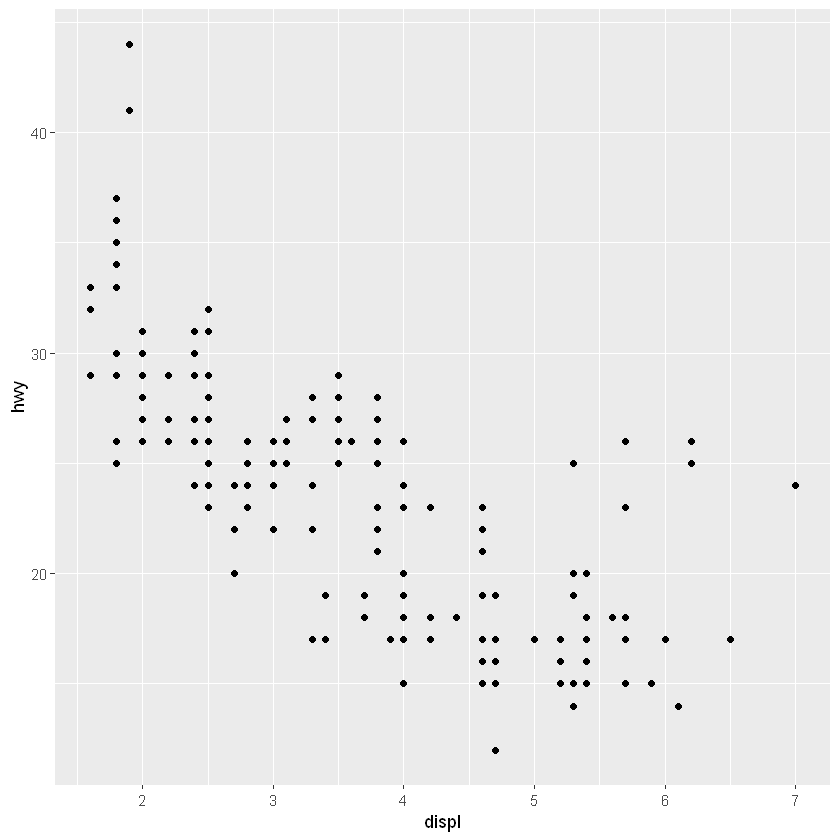

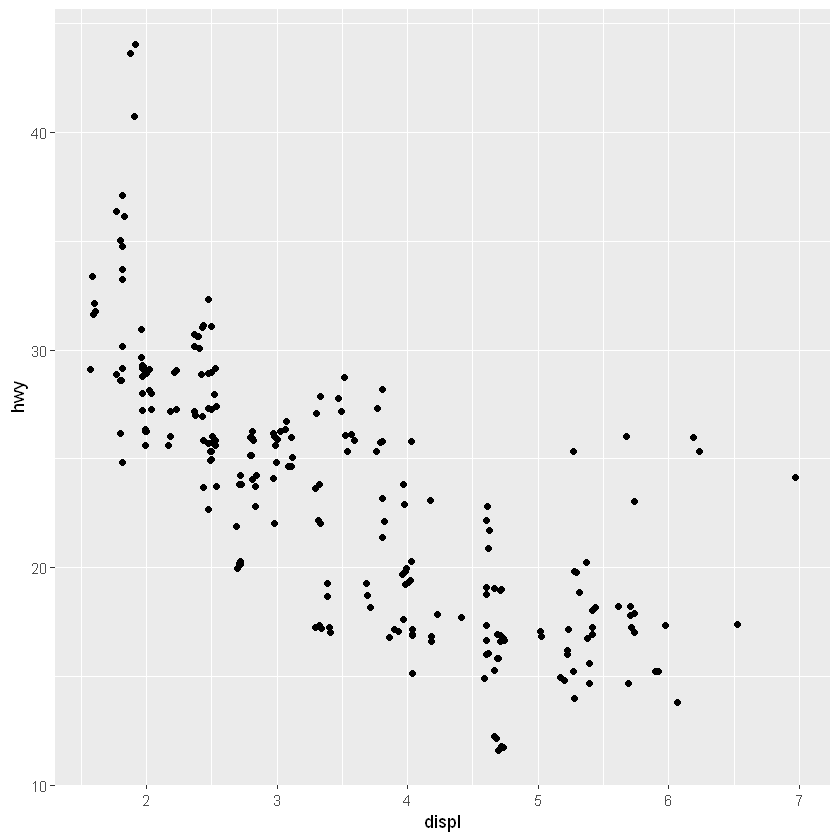

In [58]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

## Dplyr

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:

The first argument is a data frame.
The subsequent arguments describe what to do with the data frame, using the variable names (without quotes).
The result is a new data frame.

In [62]:
filter(diamonds,  color == 'J', cut == 'Fair')

carat,cut,color,clarity,depth,table,price,x,y,z
1.05,Fair,J,SI2,65.8,59,2789,6.41,6.27,4.18
1.00,Fair,J,VS2,65.7,59,2811,6.14,6.07,4.01
0.99,Fair,J,SI1,55.0,61,2812,6.72,6.67,3.68
0.90,Fair,J,VS2,65.0,56,2815,6.08,6.04,3.94
0.91,Fair,J,VS2,64.4,62,2854,6.06,6.03,3.89
0.91,Fair,J,VS2,65.4,60,2854,6.04,6.00,3.94
1.00,Fair,J,VS1,65.5,55,2875,6.30,6.25,4.11
0.99,Fair,J,SI1,58.0,67,2949,6.57,6.50,3.79
0.90,Fair,J,VS1,65.4,60,2964,6.02,5.93,3.91
0.90,Fair,J,VS1,64.6,58,2964,6.12,6.06,3.93


In [ ]:
## a = filter(diamonds, color == 'D' | clarity=='VS2') 
# filtering for rows that satisfy one or both of the conditions

b = filter(diamonds, color == 'D' & clarity == 'VS2') 
# filtering for rows that satisfy both conditions

best_cuts = filter(diamonds, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(diamonds, cut > 'Fair') 
# can do this because cut is an ordinal variable


In [78]:
slice(a, 1:6)

carat,cut,color,clarity,depth,table,price,x,y,z
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,E,VS2,63.8,55,352,3.85,3.92,2.48
0.30,Very Good,J,VS2,62.2,57,357,4.28,4.30,2.67
0.23,Very Good,D,VS2,60.5,61,357,3.96,3.97,2.40
0.23,Very Good,D,VS1,61.9,58,402,3.92,3.96,2.44


In [79]:
head(a)

carat,cut,color,clarity,depth,table,price,x,y,z
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,E,VS2,63.8,55,352,3.85,3.92,2.48
0.30,Very Good,J,VS2,62.2,57,357,4.28,4.30,2.67
0.23,Very Good,D,VS2,60.5,61,357,3.96,3.97,2.40
0.23,Very Good,D,VS1,61.9,58,402,3.92,3.96,2.44


In [83]:
a[1:6, 2]

cut
Premium
Fair
Very Good
Very Good
Very Good
Very Good


## Select

In [85]:
names(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [90]:
head(select(diamonds, depth:cut))

depth,clarity,color,cut
61.5,SI2,E,Ideal
59.8,SI1,E,Premium
56.9,VS1,E,Good
62.4,VS2,I,Premium
63.3,SI2,J,Good
62.8,VVS2,J,Very Good


In [ ]:
head(select(diamonds, c(carat, table, price)))

In [91]:
head(select(diamonds, -c(carat, table, price)))

cut,color,clarity,depth,x,y,z
Ideal,E,SI2,61.5,3.95,3.98,2.43
Premium,E,SI1,59.8,3.89,3.84,2.31
Good,E,VS1,56.9,4.05,4.07,2.31
Premium,I,VS2,62.4,4.20,4.23,2.63
Good,J,SI2,63.3,4.34,4.35,2.75
Very Good,J,VVS2,62.8,3.94,3.96,2.48


In [93]:
rename(diamonds, width=x)[1:10,]

carat,cut,color,clarity,depth,table,price,width,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


In [95]:
select(diamonds, price, carat, everything())[1:10,]

price,carat,cut,color,clarity,depth,table,x,y,z
326,0.23,Ideal,E,SI2,61.5,55,3.95,3.98,2.43
326,0.21,Premium,E,SI1,59.8,61,3.89,3.84,2.31
327,0.23,Good,E,VS1,56.9,65,4.05,4.07,2.31
334,0.29,Premium,I,VS2,62.4,58,4.20,4.23,2.63
335,0.31,Good,J,SI2,63.3,58,4.34,4.35,2.75
336,0.24,Very Good,J,VVS2,62.8,57,3.94,3.96,2.48
336,0.24,Very Good,I,VVS1,62.3,57,3.95,3.98,2.47
337,0.26,Very Good,H,SI1,61.9,55,4.07,4.11,2.53
337,0.22,Fair,E,VS2,65.1,61,3.87,3.78,2.49
338,0.23,Very Good,H,VS1,59.4,61,4.00,4.05,2.39


## Arrange

In [98]:
arrange(diamonds, price)[1:5, ]

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [100]:
arrange(diamonds, price, desc(table))[1:5, ]

carat,cut,color,clarity,depth,table,price,x,y,z
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


## Brief talk on pipes

- %>%
- 'Ctrl-shift-m' is a short cut
- Passes the output of one function as the first input to the next function

In [101]:
df <- college_df  %>%
    group_by(Major_category)  %>% 
    summarize(cat_median = mean(Median))

In [106]:
df

Major_category,cat_median
Agriculture & Natural Resources,55000.00
Arts,43525.00
Biology & Life Science,50821.43
Business,60615.38
Communications & Journalism,49500.00
Computers & Mathematics,66272.73
Education,43831.25
Engineering,77758.62
Health,56458.33
Humanities & Liberal Arts,46080.00


## Exercises

- Using the df I created just above, create a barplot with the Major_category on the x-axis, and the median on the y axis

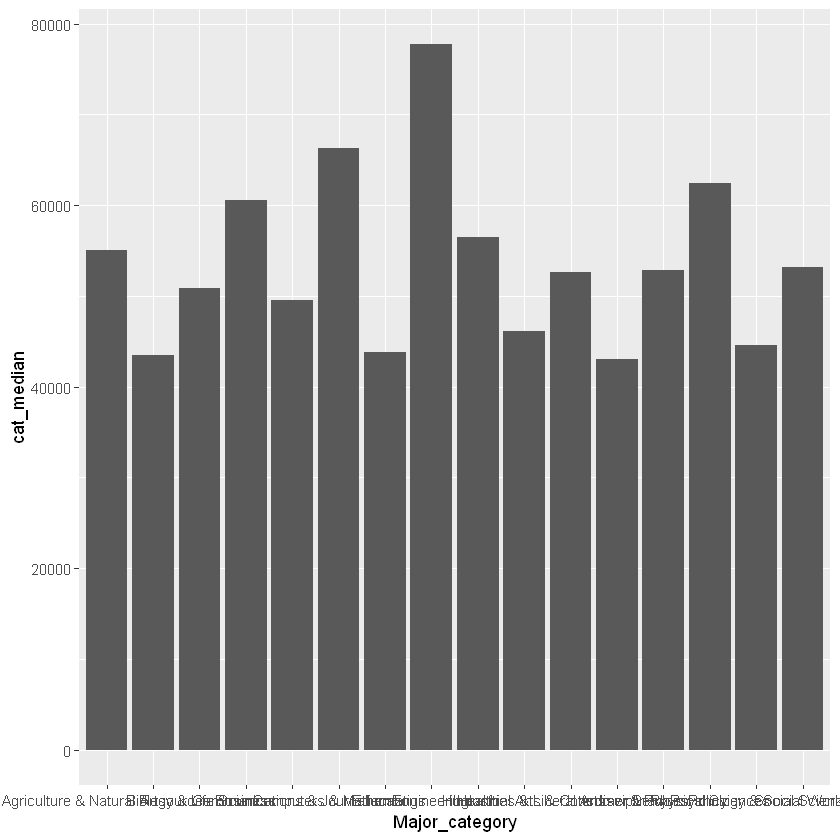

- This looks horrible! Why? What are some possible solutions?
- Here's one: Try filtering out some Major categories so that there is less clutter. If you thought of another, feel free to try that as well.

In [111]:
unique(df$Major_category)

[1] "Agriculture & Natural Resources"     "Arts"                               
 [3] "Biology & Life Science"              "Business"                           
 [5] "Communications & Journalism"         "Computers & Mathematics"            
 [7] "Education"                           "Engineering"                        
 [9] "Health"                              "Humanities & Liberal Arts"          
[11] "Industrial Arts & Consumer Services" "Interdisciplinary"                  
[13] "Law & Public Policy"                 "Physical Sciences"                  
[15] "Psychology & Social Work"            "Social Science"

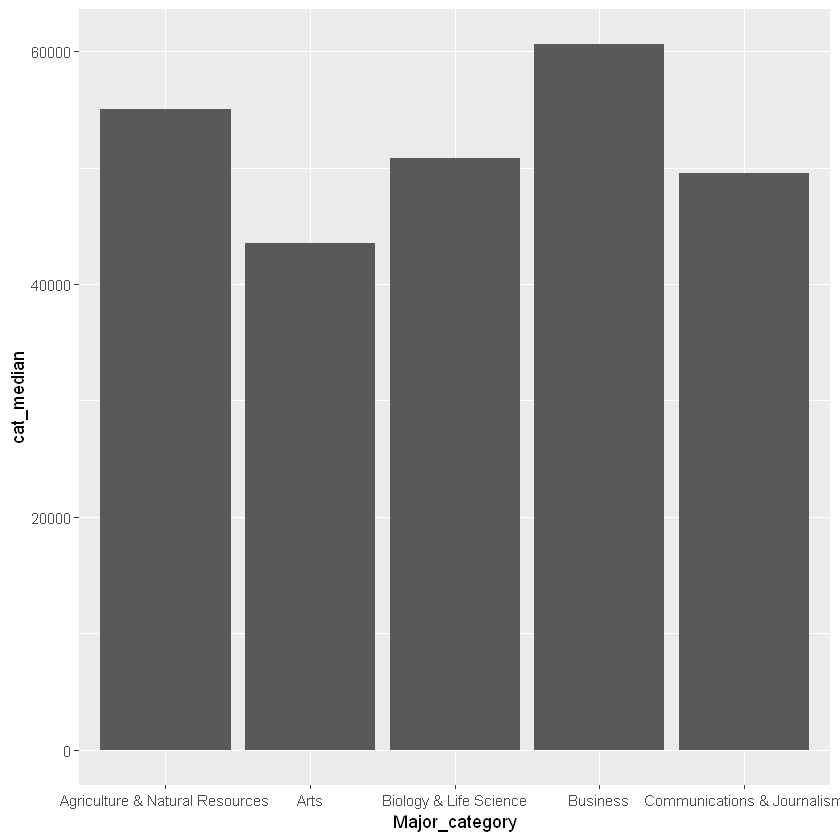

- That's a bit better! Note that the x-label and y-label are ugly. Look up how to change them. Also consider adding a title, and perhaps changing around the plot to look nicer in other ways. 

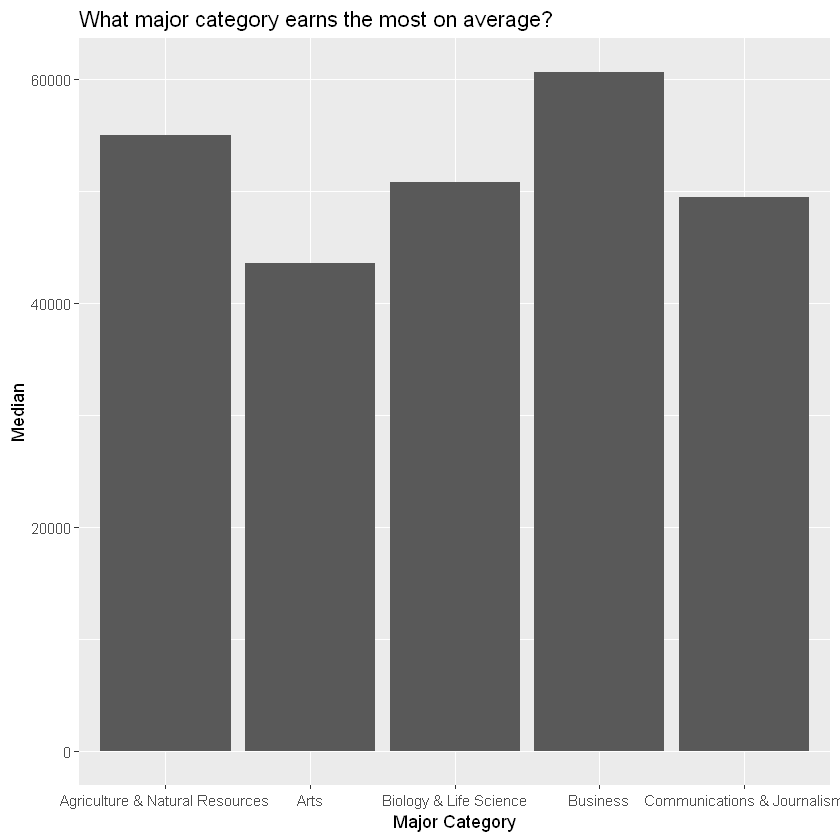

- What if you need to include more columns than just 5? Look up what coord_flip does. Just like the polar transformation we saw in lecture, it is another way to revision our data! Try using coord_flip on the whole data and see what it looks like!

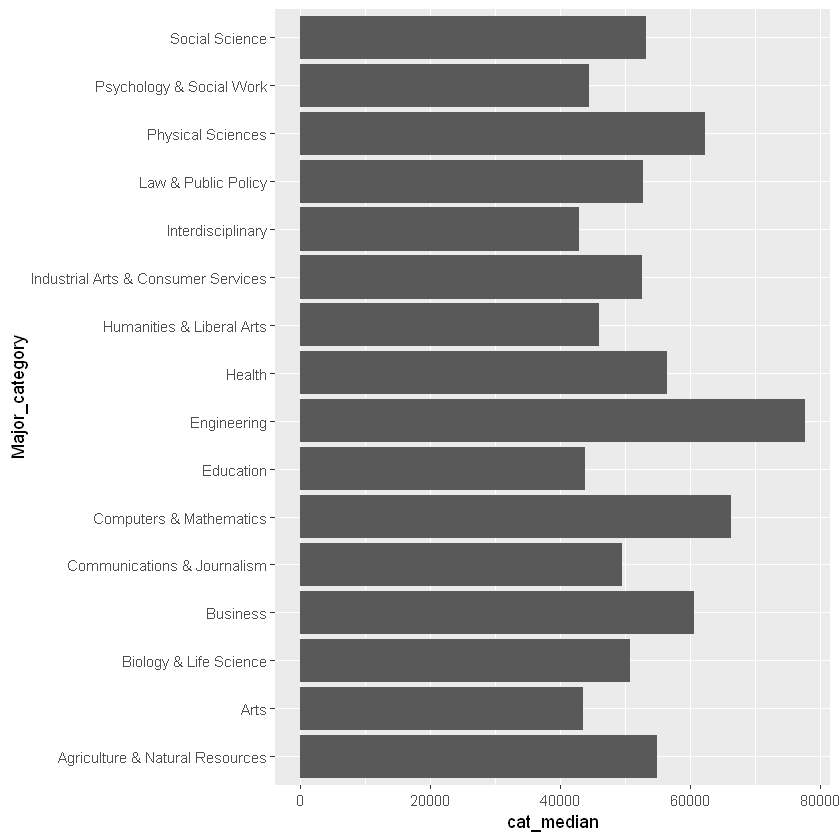

- Major_code seems like a pretty useless variable right now. Create a new dataframe called no_code (or whatever else you want!) that doesn't  contain it.
- How many majors are in the Education category? (use nrow with filter)
- How many majors in the Education Category have more than 100,000 Total students?

[1] 16

[1] 10